In [1]:
from keras.datasets import imdb

In [5]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17464789/17464789 [==============================] - 0s 0us/step


In [6]:
print(type([max(sequence) for sequence in train_data]))

<class 'list'>


In [7]:
max([max(sequence) for sequence in train_data])

9999

In [8]:
word_index = imdb.get_word_index()

1641221/1641221 [==============================] - 0s 0us/step


In [9]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [11]:
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [12]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [13]:
import numpy as np

In [15]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))

In [23]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))    # Creates an all zero matrix of shape (len(sequences),10K)
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1                        # Sets specific indices of results[i] to 1s
    return results

In [24]:
X_train = vectorize_sequences(train_data)

In [25]:
X_test = vectorize_sequences(test_data)

In [26]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [27]:
X_train.shape

(25000, 10000)

In [28]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [29]:
from keras import models
from keras import layers

In [30]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [32]:
from keras import optimizers
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),loss = losses.binary_crossentropy,metrics = [metrics.binary_accuracy])

In [33]:
# Input for Validation
X_val = X_train[:10000]
partial_X_train = X_train[10000:]
# Labels for validation
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [34]:
history = model.fit(partial_X_train,partial_y_train,epochs=20,batch_size=512,validation_data=(X_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 100ms/step - loss: 0.5609 - binary_accuracy: 0.7700 - val_loss: 0.4393 - val_binary_accuracy: 0.8551
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3666 - binary_accuracy: 0.8814 - val_loss: 0.3447 - val_binary_accuracy: 0.8745
Epoch 3/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2758 - binary_accuracy: 0.9075 - val_loss: 0.3011 - val_binary_accuracy: 0.8840
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2237 - binary_accuracy: 0.9236 - val_loss: 0.2827 - val_binary_accuracy: 0.8891
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1907 - binary_accuracy: 0.9341 - val_loss: 0.2758 - val_binary_accuracy: 0.8886
Epoch 6/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1611 - binary_accuracy: 0.9479 - val_loss: 0.2879 - val_binary_accuracy: 0.8872
Epoch 7/20
30/30 [==============================] - 1s 49ms/step - lo

In [35]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

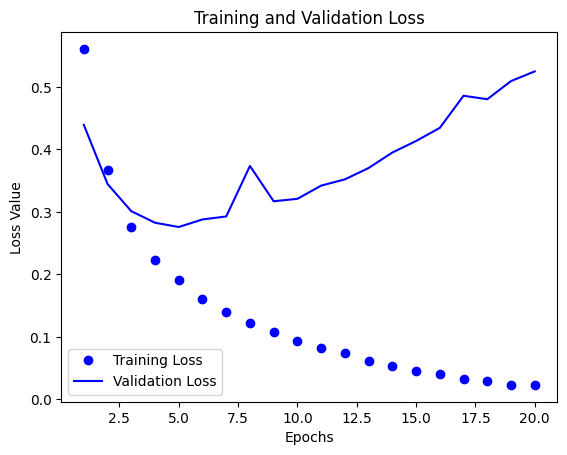

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plotting losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

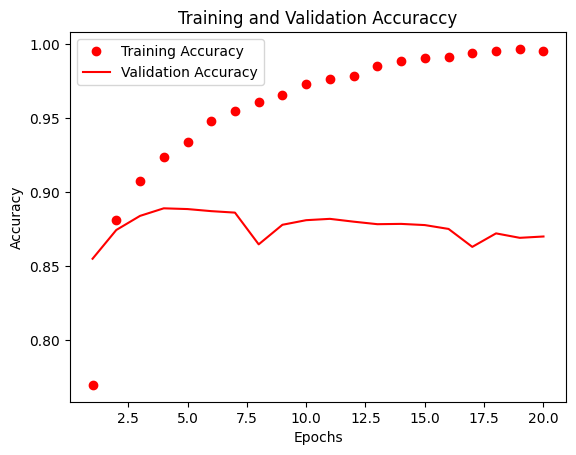

In [37]:
# Training and Validation Accuracy
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")
plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [38]:
model.fit(partial_X_train,partial_y_train,epochs=3,batch_size=512,validation_data=(X_val, y_val))

Epoch 1/3
30/30 [==============================] - 2s 74ms/step - loss: 0.0194 - binary_accuracy: 0.9965 - val_loss: 0.5446 - val_binary_accuracy: 0.8710
Epoch 2/3
30/30 [==============================] - 1s 33ms/step - loss: 0.0117 - binary_accuracy: 0.9995 - val_loss: 0.5674 - val_binary_accuracy: 0.8697
Epoch 3/3
30/30 [==============================] - 1s 34ms/step - loss: 0.0140 - binary_accuracy: 0.9982 - val_loss: 0.5950 - val_binary_accuracy: 0.8698


In [39]:
# Making Predictions for testing data
np.set_printoptions(suppress=True)
result = model.predict(X_test)
result

782/782 [==============================] - 2s 2ms/step


array([[0.01701741],
       [1.        ],
       [0.9965574 ],
       ...,
       [0.00342133],
       [0.01459549],
       [0.9858724 ]], dtype=float32)